### ANN Neural Network Model

In [23]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [27]:
df=pd.read_csv("SD_water_potability.csv")
df

,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [28]:
df['Sulfate'].fillna(df.Sulfate.mean(),inplace=True)
df

,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [31]:
df['pH'].fillna(df.pH.mean(),inplace=True)
df.isna().sum()

pH                     0
Dureté                 0
Solides                0
Chloramines            0
Sulfate                0
Conductivité           0
Carbone_organique      0
Trihalométhanes      162
Turbidité              0
Potabilité             0
dtype: int64

In [32]:
df['Trihalométhanes'].fillna(df.Trihalométhanes.mean(),inplace=True)
df.isna().sum()

pH                   0
Dureté               0
Solides              0
Chloramines          0
Sulfate              0
Conductivité         0
Carbone_organique    0
Trihalométhanes      0
Turbidité            0
Potabilité           0
dtype: int64

In [33]:
df.groupby('Potabilité').count()

,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité
Potabilité,,,,,,,,,
0,1998,1998,1998,1998,1998,1998,1998,1998,1998
1,1278,1278,1278,1278,1278,1278,1278,1278,1278


<Axes: >

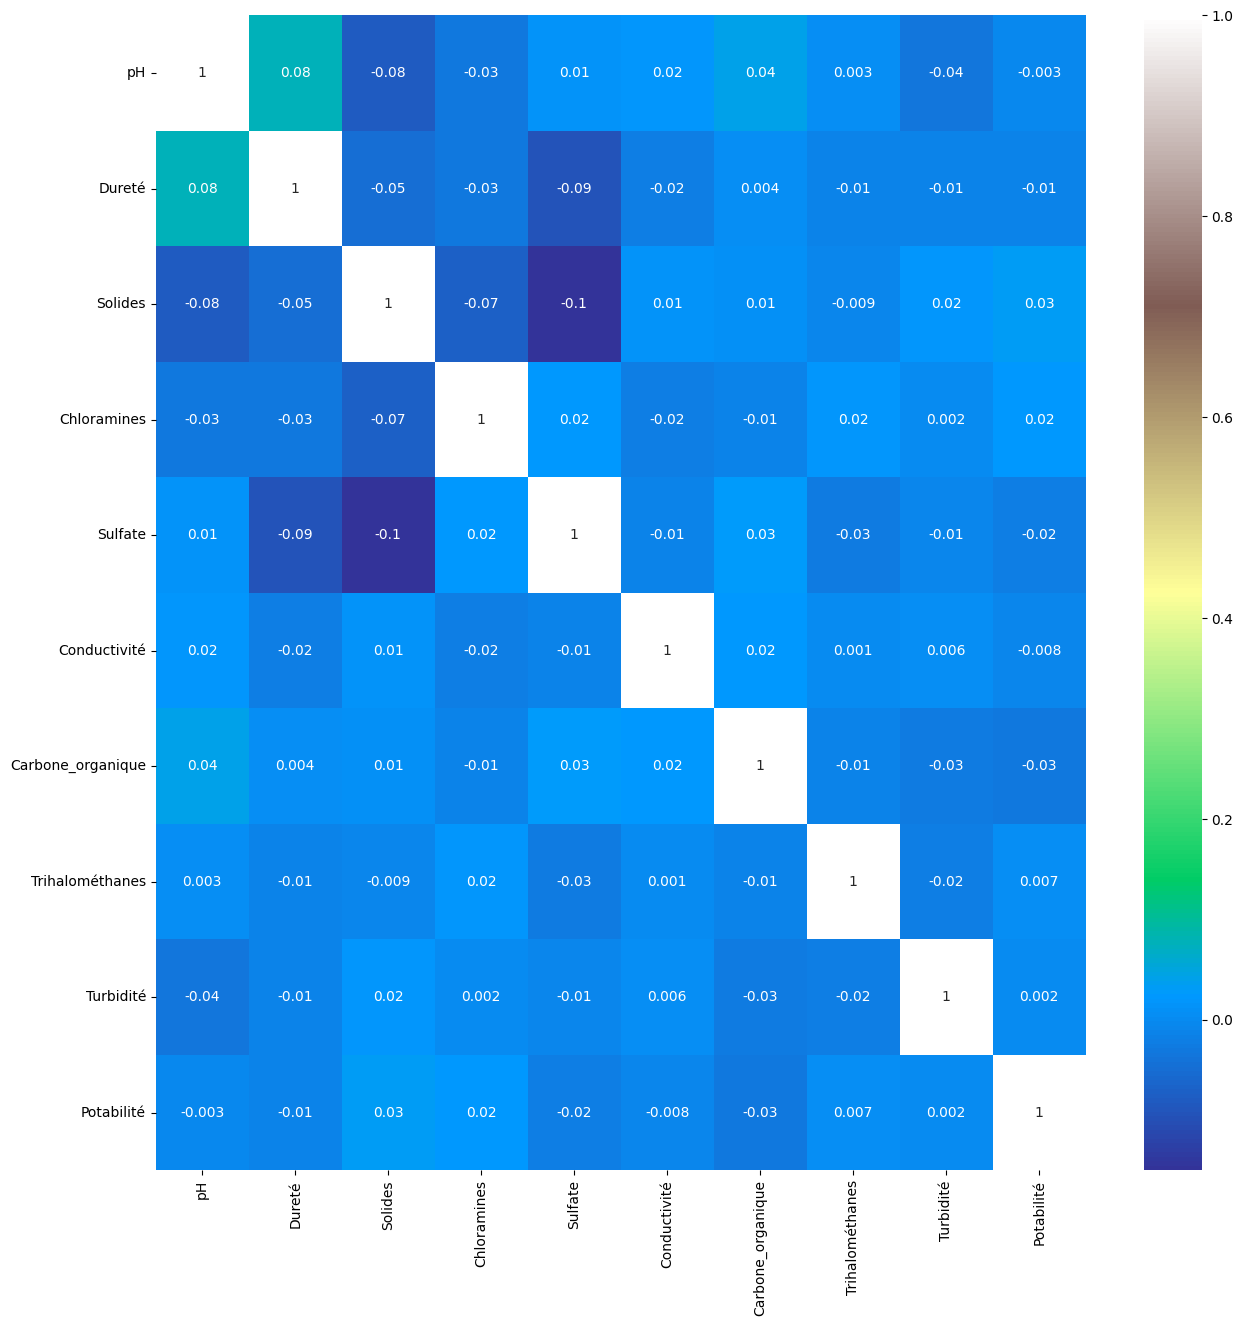

In [36]:
corr = df.corr()
plt.subplots(figsize=(15,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
         annot = True,
           fmt='.1g', cmap='terrain')

In [37]:
df.describe()

,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [38]:
df['pH'].quantile(0.99)
df['pH'].quantile(0.01)
df[df['pH']>10.812924894406171].count()
df[df['pH']<3.4425103382835722].count()

pH                   33
Dureté               33
Solides              33
Chloramines          33
Sulfate              33
Conductivité         33
Carbone_organique    33
Trihalométhanes      33
Turbidité            33
Potabilité           33
dtype: int64

In [39]:
# filters the DataFrame 'df'
# keeping only the rows where 'pH' values are within a specific range. 
df1 = df[(df.pH<10.812924894406171)&(df.pH>3.4425103382835722)]
df1

,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [40]:
# calculate the 99th and 1st percentiles

a=df['Dureté'].quantile(0.99)
b=df['Dureté'].quantile(0.01)
print(a)
print(b)

278.062602333034
114.23636579883768


In [41]:
# keeping only the rows where 'Dureté' values are within a specific range. The resulting filtered DataFrame is stored in df1 and displayed.
df1 = df1[(df1.Dureté<278.062602333034)&(df1.Dureté>114.23636579883768)]
df1

,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [42]:
c=df['Solides'].quantile(0.99)

d=df['Solides'].quantile(0.01)
print(c)
print(d)
df1 = df1[(df1.Solides<45974.10648980326)&(df1.Solides>5416.238724468493)]
df1

45974.10648980326
5416.238724468493


,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [49]:
c = df['Chloramines'].quantile(0.99)
d = df['Chloramines'].quantile(0.01)
print(c)
print(d)
df1 = df1[df1['Chloramines'] <= c]
df1 = df1[df1['Chloramines'] >= d]
df1  

10.967152881398318
3.2030819022911725


,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [50]:
c=df['Sulfate'].quantile(0.99)
d=df['Sulfate'].quantile(0.01)
print(c)
print(d)
df1 = df1[df1['Sulfate'] <= c]
df1 = df1[df1['Sulfate'] >= d]
df1

429.0281388090126
237.13695691301785


,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [51]:
c=df['Conductivité'].quantile(0.99)

d=df['Conductivité'].quantile(0.01)
print(c)
print(d)
df1 = df1[df1['Conductivité'] <= c]
df1 = df1[df1['Conductivité'] >= d]
df1

617.6265581538769
269.4229472311401


,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [52]:
c=df['Carbone_organique'].quantile(0.99)

d=df['Carbone_organique'].quantile(0.01)
print(c)
print(d)
df1 = df1[df1['Carbone_organique'] <= c]
df1 = df1[df1['Carbone_organique'] >= d]
df1
    

22.090048927593102
6.452487037954768


,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [53]:
c=df['Trihalométhanes'].quantile(0.99)

d=df['Trihalométhanes'].quantile(0.01)
print(c)
print(d)
df1 = df1[df1['Trihalométhanes'] <= c]
df1 = df1[df1['Trihalométhanes'] >= d]
df1

104.60629940595828
28.52499261378618


,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [54]:
c=df['Turbidité'].quantile(0.99)

d=df['Turbidité'].quantile(0.01)
print(c)
print(d)
df1 = df1[df1['Turbidité'] <= c]
df1 = df1[df1['Turbidité'] >= d]
df1

5.741639726505603
2.1614141449375825


,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [55]:

df1.describe()
     

,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité,Potabilité
count,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000
mean,7.074135,196.260057,21877.098451,7.107863,334.107559,425.822580,14.308021,66.396416,3.968915,0.380312
std,1.309572,29.498662,8019.336725,1.429573,32.229659,76.309008,3.080814,14.594464,0.731500,0.485552
min,3.445062,114.371450,5477.347215,3.239580,237.517456,269.449051,6.478626,28.566364,2.165682,0.000000
25%,6.316471,177.828302,15796.399698,6.179377,318.026087,367.934555,12.176678,56.921862,3.445756,0.000000
50%,7.080795,196.952875,20988.429410,7.108628,333.775777,421.464253,14.236013,66.396293,3.949220,0.000000
75%,7.819659,215.445204,27064.418409,8.065886,349.995746,480.308581,16.516232,76.443961,4.497629,1.000000
max,10.811290,278.056321,45939.689158,10.908687,427.377802,617.540906,22.045457,104.580881,5.738991,1.000000


In [56]:
df1.groupby('Potabilité').count()

,pH,Dureté,Solides,Chloramines,Sulfate,Conductivité,Carbone_organique,Trihalométhanes,Turbidité
Potabilité,,,,,,,,,
0,1706,1706,1706,1706,1706,1706,1706,1706,1706
1,1047,1047,1047,1047,1047,1047,1047,1047,1047


In [57]:
X=df1.drop('Potabilité',axis='columns')
y=df1['Potabilité']

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [115]:
callback = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [116]:
model = Sequential()
model.add(Dense(12, input_shape=(9,), activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))  # Add Dropout layer
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=100,
    verbose=1,
    callbacks=[callback]
)
#model.add(Dropout(0.2, input_shape=(60,)))

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 19.5544 - accuracy: 0.5141 - val_loss: 0.6996 - val_accuracy: 0.3793
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.3806 - val_loss: 0.6959 - val_accuracy: 0.3793
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4505 - val_loss: 0.6924 - val_accuracy: 0.6207
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.6194 - val_loss: 0.6901 - val_accuracy: 0.6207
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.6194 - val_loss: 0.6877 - val_accuracy: 0.6207
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.6194 - val_loss: 0.6855 - val_accuracy: 0.6207
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.6194 - val_loss: 0.6834 - val_accuracy: 0.6207
Epoch 8/100


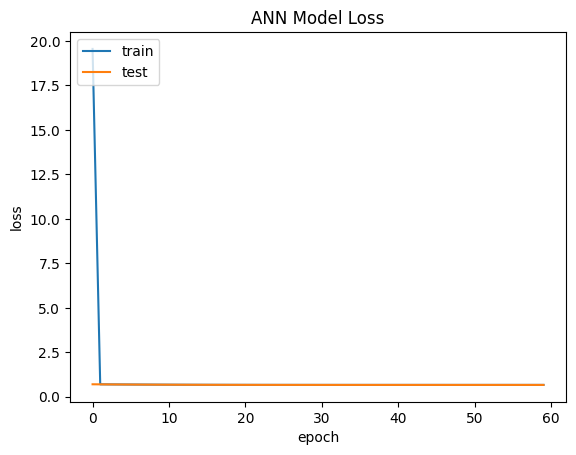

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

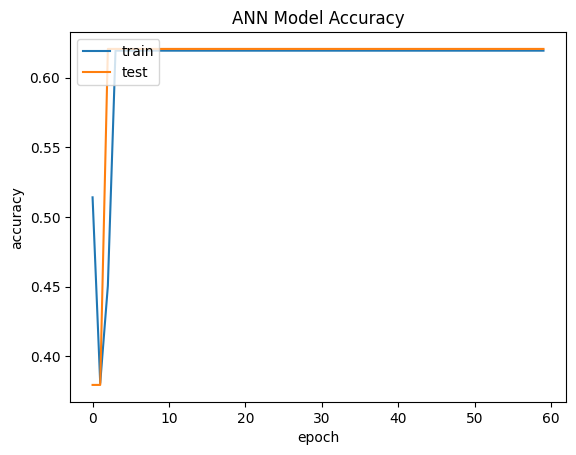

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 12)                120       
                                                                 
 dense_61 (Dense)            (None, 8)                 104       
                                                                 
 dense_62 (Dense)            (None, 5)                 45        
                                                                 
 dense_63 (Dense)            (None, 3)                 18        
                                                                 
 dense_64 (Dense)            (None, 1)                 4         
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
None
